In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [43]:
test_alpha = []
test_iterations = []
err_last = 1e+10 # Инициализация переменной для хранения предыдущего значения функции потерь
eps = 1e-5 # Точность
for alpha in np.linspace(1e-4, 0.115, 100): # Перебираем скорость градиентного спуска
    W = np.array([1, 0.5])
    for i in range(10000):
      y_pred = np.dot(W, X)
      err = calc_mse(y, y_pred)
      for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/len(y) * 2 * np.sum(X[ii] * (y_pred - y)))
#       if i % 1000 == 0:
#         print(i, W, err)
      if i == 9999: # Если достигнули конца i
        print(f"Reached 10000 iterations. Alpha {alpha} Lost: {err}, Previous lost: {err_last}")
        print(i, W, err)
        print("*" * 50)
        break
      if np.abs(err_last - err) < eps: # Если изменение значения функции потерь меньше точности
        print(f"Reached stability value of lost function on {i} iteration. Alpha {alpha}, lost: {err}")
        print(i, W, err)
        print("*" * 50)
        break
        
      err_last = err
    test_alpha.append(alpha)
    test_iterations.append(i)
        

Reached 10000 iterations. Alpha 0.0001 Lost: 176.62240977239327, Previous lost: 176.64959072853722
9999 [31.64269117  6.78942579] 176.62240977239327
**************************************************
Reached stability value of lost function on 4774 iteration. Alpha 0.0012606060606060606, lost: 45.94130655185274
4774 [47.14810799  3.92623197] 45.94130655185274
**************************************************
Reached stability value of lost function on 2614 iteration. Alpha 0.002421212121212121, lost: 45.939477376378655
2614 [47.17164873  3.92188499] 45.939477376378655
**************************************************
Reached stability value of lost function on 1819 iteration. Alpha 0.0035818181818181812, lost: 45.93883068655932
1819 [47.18257722  3.91986696] 45.93883068655932
**************************************************
Reached stability value of lost function on 1402 iteration. Alpha 0.004742424242424242, lost: 45.938499057291025
1402 [47.18924737  3.91863527] 45.9384990572910

Reached stability value of lost function on 3858 iteration. Alpha 0.06625454545454545, lost: 45.94034807660718
3858 [47.23463401  3.92420493] 45.94034807660718
**************************************************
Reached 10000 iterations. Alpha 0.06741515151515151 Lost: 2.7984936211245813e+287, Previous lost: 2.6212511222189855e+287
9999 [-2.55596036e+142 -1.38416164e+143] 2.7984936211245813e+287
**************************************************


C:\Users\vladimir\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  


Reached 10000 iterations. Alpha 0.06857575757575758 Lost: inf, Previous lost: inf
9999 [-1.25440754e+287 -6.79315231e+287] inf
**************************************************


C:\Users\vladimir\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Reached 10000 iterations. Alpha 0.06973636363636364 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.0708969696969697 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.07205757575757575 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.07321818181818182 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.07437878787878788 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.07553939393939393 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.0767 Lost: nan, Previous lost: nan
9999 [nan nan] nan
*

C:\Users\vladimir\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


Reached 10000 iterations. Alpha 0.08946666666666667 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.09062727272727272 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.09178787878787878 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.09294848484848485 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.0941090909090909 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.09526969696969696 Lost: nan, Previous lost: nan
9999 [nan nan] nan
**************************************************
Reached 10000 iterations. Alpha 0.09643030303030303 Lost: nan, Previous lost: nan
9999 [n

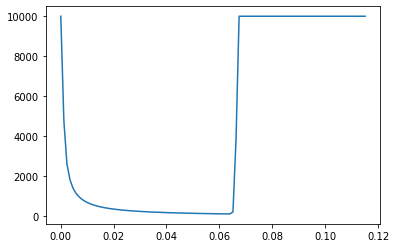

In [47]:
plt.plot(test_alpha, test_iterations)

Подобный метод перебора будет неэффективен на больших выборках но для этой задачи подошёл отлично.
Перебрав различные значения скорости спуска, было обнаружено, что при незначительном увеличении значения альфа
cкорость сходимости алгоритма сильно вырастает при изменени от 0.001 до 0.007, далее изменяется не так быстро и при значении 0.0639 достигает своего минимума, сходимость достигается за 192 итерации. Далее происходит резкое увеличение числа итераций из-за того, что при больших альфа алгоритм не может достигнуть экстремума, проскакивает мимо него. При значениях выше 0.06741 сходимость за условный максимум количества итераций (10000) не происходит.
Оптимальным будет значаение 0.061 и количество итераций 200 (для этого набора и для точности 1e-9. 
С понижением точности количество итераций незначительно уменьшается.

In [44]:
W = np. array([47.2321422 ,  3.91071213])


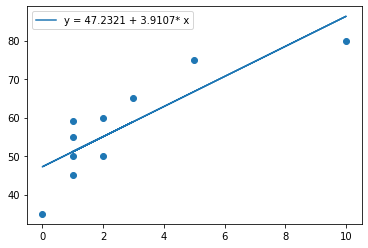

In [45]:
plt.scatter(X[1,:], y)
plt.plot(X[1], W[0] + W[1] * X[1], label=f'y = {W[0]:.4f} + {W[1]:.4f}* x')
plt.legend()


In [46]:
n = X.shape[1]
alpha = 0.061
W = np.array([1, 0.5])
for i in range(201):
  y_pred = np.dot(W, X)
  err = calc_mse(y, y_pred)
  W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1  ))) # Добавлено axis=1 в сумме, чтобы получить 2 измерения
  if i % 100 == 0:
    print(i, W, err)
W

0 [ 7.7222 21.24  ] 3173.15
100 [47.17323831  3.92159172] 45.939626611300376
200 [47.23205885  3.9107298 ] 45.937500004325656
